## Data review

In [1]:
# download libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load data
data_calls = pd.read_csv('')
data_internet = pd.read_csv('')
data_messages = pd.read_csv('')
data_tarrifs = pd.read_csv('')
data_users = pd.read_csv('')

Look at datasets

In [4]:
# calls data
display(data_calls.info())
data_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
# internet data
display(data_internet.info())
data_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
# messages data
display(data_messages.info())
data_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
# tarriffs data
display(data_tarrifs.info())
data_tarrifs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [8]:
# users data
display(data_users.info())
data_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


## Preparing data

### Change data type

In [9]:
# dates to datetime
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
# check
data_calls['call_date'].head()

0   2018-07-25
1   2018-08-17
2   2018-06-11
3   2018-09-21
4   2018-12-15
Name: call_date, dtype: datetime64[ns]

In [10]:
# dates to datetime
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
# check
data_internet['session_date'].head()

0   2018-11-25
1   2018-09-07
2   2018-06-25
3   2018-08-22
4   2018-09-24
Name: session_date, dtype: datetime64[ns]

In [11]:
# dates to datetime
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
# check
data_messages['message_date'].head()

0   2018-06-27
1   2018-10-08
2   2018-08-04
3   2018-06-16
4   2018-12-05
Name: message_date, dtype: datetime64[ns]

In [12]:
# dates to datetime
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')
# check
data_users[['reg_date', 'churn_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   reg_date    500 non-null    datetime64[ns]
 1   churn_date  38 non-null     datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 7.9 KB


### Calculations
#### number calls and spent minutes per month

In [13]:
# create column with month of call
data_calls['month'] = data_calls['call_date'].dt.month
data_calls['month']

0          7
1          8
2          6
3          9
4         12
          ..
202602    12
202603    10
202604    11
202605    10
202606    12
Name: month, Length: 202607, dtype: int64

In [14]:
# round call's duration
data_calls['duration'] = data_calls['duration'].apply(np.ceil).astype(int)

In [15]:
# create pivot table
data_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])

count      sum
              duration duration
user_id month                  
1000    5           22      159
        6           43      172
        7           47      340
        8           52      408
        9           58      466
...                ...      ...
1498    10          41      247
1499    9            9       70
        10          68      449
        11          74      612
        12          69      492

[3174 rows x 2 columns]

#### number sent messages per month

In [16]:
# create columns with month of message
data_messages['month'] = data_messages['message_date'].dt.month
data_messages['month'].value_counts()

12    20555
11    18244
10    17114
9     14759
8     13088
7     11320
6      8983
5      7298
4      5179
3      3648
2      1924
1       924
Name: month, dtype: int64

In [17]:
# pivot table
data_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
...            ..
1498    10     42
1499    9      11
        10     48
        11     59
        12     66

[2717 rows x 1 columns]

#### amount of spent traffic per month

In [18]:
# column with traffic in Gb
data_internet['gb_used'] = data_internet['mb_used'] / 1024
# column with month of sessions
data_internet['month'] = data_internet['session_date'].dt.month

In [19]:
# pivot table
data_pivot_internet = data_internet.pivot_table(index=['user_id', 'month'], values='gb_used', aggfunc='sum').reset_index()
# round
data_pivot_internet['gb_used'] = data_pivot_internet['gb_used'].apply(np.ceil).astype(int)
data_pivot_internet

,user_id,month,gb_used
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15
...,...,...,...
3198,1498,10,21
3199,1499,9,2
3200,1499,10,18
3201,1499,11,18


#### revenue per month from users

In [20]:
# join
data_pivot_messages = data_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
data_pivot_calls = data_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum']).reset_index()
data_pivot_total = data_pivot_internet.merge(data_pivot_messages, on=['user_id', 'month'], how='outer').merge(data_pivot_calls,  on=['user_id', 'month'], how='outer').merge(data_users, on='user_id', how='left').merge(data_tarrifs, left_on='tariff', right_on='tariff_name', how='left')

In [21]:
# rename column names
data_pivot_total.rename({'id': 'count_messages', ('count', 'duration'): 'count_calls', ('sum', 'duration'): 'duration_calls'}, axis='columns', inplace=True)

In [22]:
# fill NA values
data_pivot_total['count_messages'] = data_pivot_total['count_messages'].fillna(0)
data_pivot_total['count_calls'] = data_pivot_total['count_calls'].fillna(0)
data_pivot_total['duration_calls'] = data_pivot_total['duration_calls'].fillna(0)
data_pivot_total['gb_used'] = data_pivot_total['gb_used'].fillna(0)

In [23]:
# add column with tarrif by Gb
data_pivot_total['gb_per_month_included'] = data_pivot_total['mb_per_month_included'] / 1024
# round
data_pivot_total['gb_per_month_included'] = data_pivot_total['gb_per_month_included'].apply(np.ceil).astype(int)

In [24]:
# create function that counting Gb, minutes and messages over plan
def gb_over_plan(row):
    """
    Возвращает кол-во Гб сверх подключенного плана
    """
    if row['gb_used'] <= row['gb_per_month_included']:
        return 0
    else:
        return row['gb_used'] - row['gb_per_month_included']
        

def minutes_over_plan(row):
    """
    Возвращает кол-во минут сверх подключенного плана
    """
    if row['duration_calls'] <= row['minutes_included']:
        return 0
    else:
        return row['duration_calls'] - row['minutes_included']
        
def messages_over_plan(row):
    """
    Возвращает кол-во сообщений сверх подключенного плана
    """
    if row['count_messages'] <= row['messages_included']:
        return 0
    else:
        return row['count_messages'] - row['messages_included']
        
# apply functions
data_pivot_total['gb_over_plan'] = data_pivot_total.apply(gb_over_plan, axis=1)
data_pivot_total['minutes_over_plan'] = data_pivot_total.apply(minutes_over_plan, axis=1)
data_pivot_total['messages_over_plan'] = data_pivot_total.apply(messages_over_plan, axis=1)

In [25]:
# column with total cost
data_pivot_total['total_revenue'] = data_pivot_total['rub_monthly_fee'] + (data_pivot_total['gb_over_plan'] * data_pivot_total['rub_per_gb']) + (data_pivot_total['minutes_over_plan'] * data_pivot_total['rub_per_minute']) + (data_pivot_total['messages_over_plan'] * data_pivot_total['rub_per_message'])
# check
data_pivot_total[['rub_monthly_fee', 'gb_used', 'gb_per_month_included', 'count_messages', 'messages_included', 'duration_calls', 'minutes_included', 'total_revenue']]

,rub_monthly_fee,gb_used,gb_per_month_included,count_messages,messages_included,duration_calls,minutes_included,total_revenue
0,1950,3.0,30,22.0,1000,159.0,3000,1950.0
1,1950,23.0,30,60.0,1000,172.0,3000,1950.0
2,1950,14.0,30,75.0,1000,340.0,3000,1950.0
3,1950,14.0,30,81.0,1000,408.0,3000,1950.0
4,1950,15.0,30,57.0,1000,466.0,3000,1950.0
...,...,...,...,...,...,...,...,...
3209,1950,0.0,30,29.0,1000,272.0,3000,1950.0
3210,1950,0.0,30,39.0,1000,260.0,3000,1950.0
3211,1950,0.0,30,2.0,1000,179.0,3000,1950.0
3212,1950,0.0,30,3.0,1000,13.0,3000,1950.0


## Analys data
The description of customer behavior

In [26]:
# create slices with tariffs
data_total_smart = data_pivot_total.query('tariff == "smart"')
data_total_ultra = data_pivot_total.query('tariff == "ultra"')

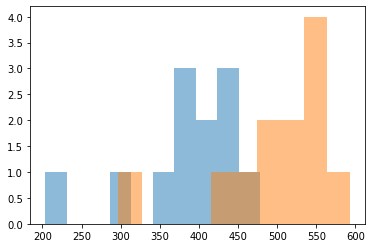

In [27]:
# charts with call's duration
x = data_total_smart.pivot_table(index='month', values='duration_calls').reset_index()['duration_calls']
y = data_total_ultra.pivot_table(index='month', values='duration_calls').reset_index()['duration_calls']

plt.hist(x, label='x', alpha=0.5)
plt.hist(y, label='y', alpha=0.5)
plt.show()

In [28]:
# mean, var and std
print('Tariff "Смарт"')
print('Average number of minutes:', int(data_total_smart['duration_calls'].mean()))
print('Dispersion:', int(np.var(data_total_smart['duration_calls'])))
print('Standart deviation:', int(np.sqrt(int(np.var(data_total_smart['duration_calls'])))))
print()
print('Tariff "Ультра"')
print('Average number of minutes:', int(data_total_ultra['duration_calls'].mean()))
print('Dispersion:', int(np.var(data_total_ultra['duration_calls'])))
print('Standart deviation:', int(np.sqrt(int(np.var(data_total_ultra['duration_calls'])))))

Tariff "Смарт"
Average number of minutes: 417
Dispersion: 36203
Standart deviation: 190

Tariff "Ультра"
Average number of minutes: 526
Dispersion: 100771
Standart deviation: 317


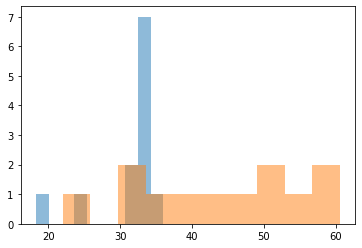

In [29]:
# chart of number messages
x_messages = data_total_smart.pivot_table(index='month', values='count_messages').reset_index()['count_messages']
y_messages = data_total_ultra.pivot_table(index='month', values='count_messages').reset_index()['count_messages']

plt.hist(x_messages, label='x', alpha=0.5)
plt.hist(y_messages, label='y', alpha=0.5)
plt.show()

In [30]:
# mean, var and std
print('Tariff "Смарт"')
print('Average number of minutes:', int(data_total_smart['count_messages'].mean()))
print('Dispersion:', int(np.var(data_total_smart['count_messages'])))
print('Standart deviation:', int(np.sqrt(int(np.var(data_total_smart['count_messages'])))))
print()
print('Tariff "Ультра"')
print('Average number of minutes:', int(data_total_ultra['count_messages'].mean()))
print('Dispersion:', int(np.var(data_total_ultra['count_messages'])))
print('Standart deviation:', int(np.sqrt(int(np.var(data_total_ultra['count_messages'])))))

Tariff "Смарт"
Average number of minutes: 33
Dispersion: 796
Standart deviation: 28

Tariff "Ультра"
Average number of minutes: 49
Dispersion: 2282
Standart deviation: 47


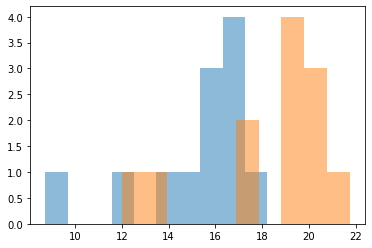

In [31]:
# chart of amount traffic
x_internet = data_total_smart.pivot_table(index='month', values='gb_used').reset_index()['gb_used']
y_internet = data_total_ultra.pivot_table(index='month', values='gb_used').reset_index()['gb_used']

plt.hist(x_internet, label='x', alpha=0.5)
plt.hist(y_internet, label='y', alpha=0.5)
plt.show()

In [32]:
# mean, var and std
print('Tariff "Смарт"')
print('Average number of minutes:', int(data_total_smart['gb_used'].mean()), 'Гб')
print('Dispersion:', int(np.var(data_total_smart['gb_used'])))
print('Standart deviation:', int(np.sqrt(int(np.var(data_total_smart['gb_used'])))))
print()
print('Tariff "Ультра"')
print('Average number of minutes:', int(data_total_ultra['gb_used'].mean()), 'Гб')
print('Dispersion:', int(np.var(data_total_ultra['gb_used'])))
print('Standart deviation:', int(np.sqrt(int(np.var(data_total_ultra['gb_used'])))))

Tariff "Смарт"
Average number of minutes: 16 Гб
Dispersion: 33
Standart deviation: 5

Tariff "Ультра"
Average number of minutes: 19 Гб
Dispersion: 96
Standart deviation: 9


<b>Conclusions:</b>
- Tariff "Ультра" have more calls, messages and traffic

## Check hypothesis
### average revenue of tariffs "Ультра" and "Смарт" different
- null hypothesis: average revenue is equal
- alternative hypothesis: average revenue differ
<br>
I use method `ttest_ind`

In [33]:
# p-value
alpha = 0.05
result = st.ttest_ind(data_total_smart['total_revenue'], data_total_ultra['total_revenue'], equal_var=False)

if result.pvalue < alpha:
    print('The null hypothesis is rejected: average revenues are not equal')
    print(f'p-value: {result.pvalue}')
else:
    print('The null hypothesis is not rejected: average revenues are equal to')
    print(f'p-value: {result.pvalue}')

The null hypothesis is rejected: average revenues are not equal
p-value: 4.2606313931076085e-250


### average revenue of customer from Moscow differs from that of customer from other cities
- null hypothesis: average revenue of Moscow and other regions is equal
- alternative hypothesis: average revenues are not equal
<br>
I use method `ttest_ind`

In [34]:
# create slices of Moscow and other regions
data_moscow = data_pivot_total.query('city == "Москва"')
data_not_moscow = data_pivot_total.query('city != "Москва"')

In [35]:
# counting
result_2 = st.ttest_ind(data_moscow['total_revenue'], data_not_moscow['total_revenue'], equal_var=False)

if result.pvalue < alpha:
    print('The null hypothesis is rejected: average revenues Moscow and other regions are not equal')
    print(f'p-value: {result.pvalue}')
else:
    print('The null hypothesis is not rejected: average revenues Moscow and other regions are equal')
    print(f'p-value: {result.pvalue}')

The null hypothesis is rejected: average revenues Moscow and other regions are not equal
p-value: 4.2606313931076085e-250


<b>Conclusions</b>
- First hypothesis showed average revenues of two tariffs are not equal. 
- Second hypothesis showed average revenues of Moscow and other regions are not equal
## Results
- Tariff "Ультра" have more calls, messages and spent traffic. Customer uses this tariff more then others.
- check hypotheses about average revenues of two tariffs showed that revenues are not equal
- check hypothesis about average revenues of Moscow and other regions showed that revenues are not equal too